<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Timbungco, Ian Jude  J.<br>
    Student Number: <br>
    <i>201913153<br>
   Section:<br>
  <i>58010<br>
   

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

To know and identify the flavor of donuts that are need to revisit. The least profitable and least sales of flavor of donuts are:
1. Strawberry Cream
2. Oreo
3. Almond Honey

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [1]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [2]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [3]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0].reshape(12,1)## shape of the vector to the appropriate size
costs_mat = np.array(df_prices)[1].reshape(12,1) ## shape of the vector to the appropriate size

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [4]:
def monthly_sales(price, cost, sales): ## Function that solve the monthly sales 
    monthly_revenue = np.multiply(sales,price).sum(axis=0) ## Solving for the monthly_revenue
    monthly_costs = np.multiply(sales,cost).sum(axis=0) ## Solving for the monthly_costs
    monthly_profits = monthly_revenue - monthly_costs ## Solving for the monthly_profits
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten() ## return the variable monthly_revenue,monthly_costs,monthly_profit

In [5]:
## Giving values to the parameter (prices,cost,sale)
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat) 
### print the values

In [6]:
## List of months
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 

## looping to print the Monthly revenue, Monthly cost, Monthly profit
print('Monthly revenue: \tMonthly cost: \t\tMonthly profit: ')
for _sales in range(len(Months)): 
    print('{:^10}: {:>10} \t: {:>17} \t: {:>18} '.format(Months[_sales],month_rev[_sales],month_cost[_sales],month_profit[_sales] ))

Monthly revenue: 	Monthly cost: 		Monthly profit: 
 January  :     236825 	:            157454 	:              79371 
 February :     175530 	:            116322 	:              59208 
  March   :     159045 	:            105195 	:              53850 
  April   :      30335 	:             20334 	:              10001 
   May    :     150085 	:             97261 	:              52824 
   June   :      16735 	:             11208 	:               5527 
   July   :      17970 	:             12372 	:               5598 
  August  :      16995 	:             11497 	:               5498 
September :      14960 	:              9926 	:               5034 
 October  :      21590 	:             14377 	:               7213 
 November :     213655 	:            137107 	:              76548 
 December :     347365 	:            230209 	:             117156 


## Part 2: Flavor Sales

In [7]:
## Function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = np.multiply(sales,price).sum(axis=1) ## solving for the revenue for each flavor
    flavor_costs = np.multiply(sales,cost).sum(axis=1) ## solving for the cost for each flavor
    flavor_profits = flavor_revenue - flavor_costs## solving for thr profit for each flavor  
    return flavor_profits.flatten() ##returns to the variable flavor_profits

In [8]:
## Giving values to the parameters price, cost, sales
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat) 
### print the values

In [9]:
## Function that will get the second element/flavor
def price_flavor(x): 
    return x[1]

flavour = ['Red Velvet', 'Oreo', 'Sugar Glazed','Almond Honey','Matcha','Strawberry Cream','Brown Sugar Boba','Fruits and Nuts','Dark Chocolate','Chocolate and Orange','Choco Mint','Choco Butter Naught']

## solving for the total quantity sold for each flavor
Quantity = sales_mat.sum(axis=1) 

## List of flavors with their respective profits
Flavor = [                                
    ('Red Velvet',flavor_profit[0]),
    ('Oreo',flavor_profit[1]),
    ('Sugar Glazed',flavor_profit[2]),
    ('Almond Honey',flavor_profit[3]),
    ('Matcha',flavor_profit[4]),
    ('Strawberry Cream',flavor_profit[5]),
    ('Brown Sugar Boba',flavor_profit[6]),
    ('Fruits and Nuts',flavor_profit[7]),
    ('Dark Chocolate',flavor_profit[8]),
    ('Chocolate and Orange',flavor_profit[9]),
    ('Choco Mint',flavor_profit[10]),
    ('Choco Butter Naught',flavor_profit[11])
]   

## loop to print the total profits and total quantity sold on each flavor
print('Profit per Flavor(Annually): \tQuantity Sold per Flavor(Annually): \n ')
for flav in range(len(flavour)): 
    print('{:^21}: {:^10} : {:^20}'.format(flavour[flav],flavor_profit[flav],Quantity[flav]))

## Sorting the price to get the top 3 flavors
best_selling = [sorts[0] for sorts in sorted(Flavor, key=lambda x: x[1],reverse=True)[0:3]]  

## sorting the price to get the bottom 3 flavors
least_selling = [sorts[0] for sorts in sorted(Flavor, key=lambda x: x[1],reverse=False)[0:3]] 
print('\n3 Best-selling flavors: \n{} '.format(str(best_selling)[1:-1]))
print('\n 3 Least-selling flavors are: \n{}'.format(str(least_selling)[1:-1]))

Profit per Flavor(Annually): 	Quantity Sold per Flavor(Annually): 
 
     Red Velvet      :   41370    :         4137        
        Oreo         :   19040    :         1904        
    Sugar Glazed     :   53260    :         5326        
    Almond Honey     :   23715    :         1581        
       Matcha        :   61245    :         4083        
  Strawberry Cream   :   18387    :         2043        
  Brown Sugar Boba   :   30660    :         3066        
   Fruits and Nuts   :   39820    :         1991        
   Dark Chocolate    :   44790    :         2986        
Chocolate and Orange :   27615    :         1841        
     Choco Mint      :   26156    :         2012        
 Choco Butter Naught :   91770    :         6555        

3 Best-selling flavors: 
'Choco Butter Naught', 'Matcha', 'Sugar Glazed' 

 3 Least-selling flavors are: 
'Strawberry Cream', 'Oreo', 'Almond Honey'


#### Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

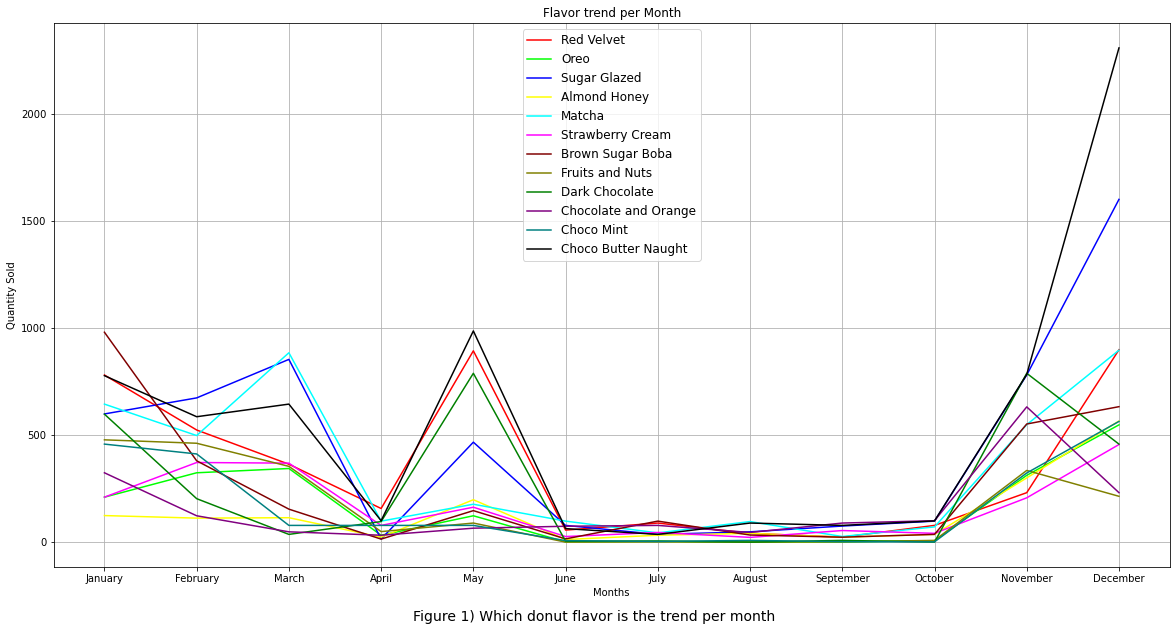

In [11]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

## Setting the size of the figure
plt.figure(figsize=(20,10)) 

 ## Labelling the vertical line, horizontal line, and the title of the figure
plt.ylabel('Quantity Sold')
plt.xlabel('Months') 
plt.title('Flavor trend per Month') 

## Plotting the months with respect to the sales of each flavor
plt.plot(Months,sales_mat[0],label='Red Velvet',color='red')
plt.plot(Months,sales_mat[1],label='Oreo',color='lime')  
plt.plot(Months,sales_mat[2],label='Sugar Glazed',color='blue')
plt.plot(Months,sales_mat[3],label='Almond Honey',color='yellow')
plt.plot(Months,sales_mat[4],label='Matcha',color='cyan')
plt.plot(Months,sales_mat[5],label='Strawberry Cream',color='magenta')
plt.plot(Months,sales_mat[6],label='Brown Sugar Boba',color='maroon')
plt.plot(Months,sales_mat[7],label='Fruits and Nuts',color='olive')
plt.plot(Months,sales_mat[8],label='Dark Chocolate',color='green')
plt.plot(Months,sales_mat[9],label='Chocolate and Orange',color='purple')
plt.plot(Months,sales_mat[10],label='Choco Mint',color='teal')
plt.plot(Months,sales_mat[11],label='Choco Butter Naught',color='black')

## Labelling the figure number and name of figure
txt="Figure 1) Which donut flavor is the trend per month"
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=14)

## Creating the gridlines
plt.grid()

## Creating the legend of the figure
plt.legend(loc=9,fontsize='large')

## Showing the created figure
plt.show()

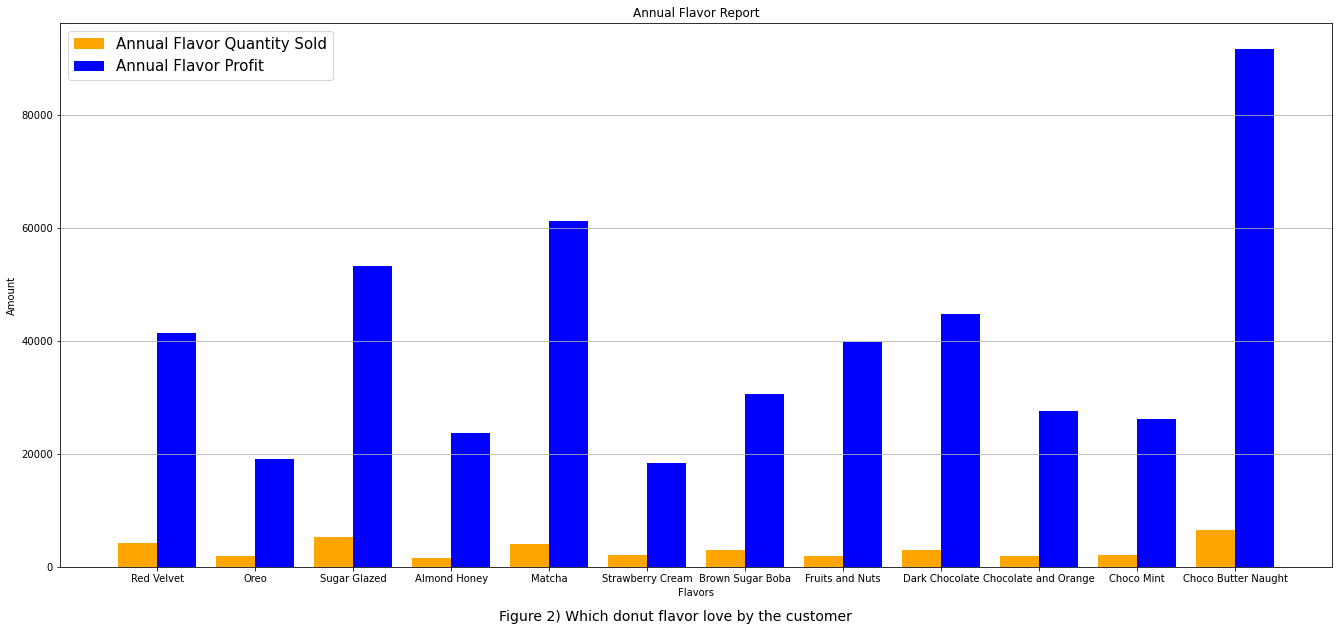

In [13]:
## Setting the size of the figure
plt.figure(figsize=(22.8,10))

## Labelling the values for horizontal line
xaxis = np.arange(len(flavour)) ## Making the flavour into int values
plt.xticks(xaxis,flavour)

## labelling the vertical line, horizontal line, title of the figure
plt.ylabel('Amount')
plt.xlabel('Flavors')
plt.title('Annual Flavor Report')

## Creating the bar graph with values
plt.bar(xaxis-0.2,Quantity,width=0.4,color='orange',label='Annual Flavor Quantity Sold')
plt.bar(xaxis+0.2,flavor_profit,width=0.4,color='blue',label='Annual Flavor Profit')

## Labelling the figure number and name of figure
txt="Figure 2) Which donut flavor love by the customer"
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=14)

## Creating the legend of the figure
plt.legend(loc='upper left',prop={'size': 15})

## Creating a grid horizontal lines only
plt.grid(axis='y')

## Showing the figure created
plt.show()

#### Monthly Sales

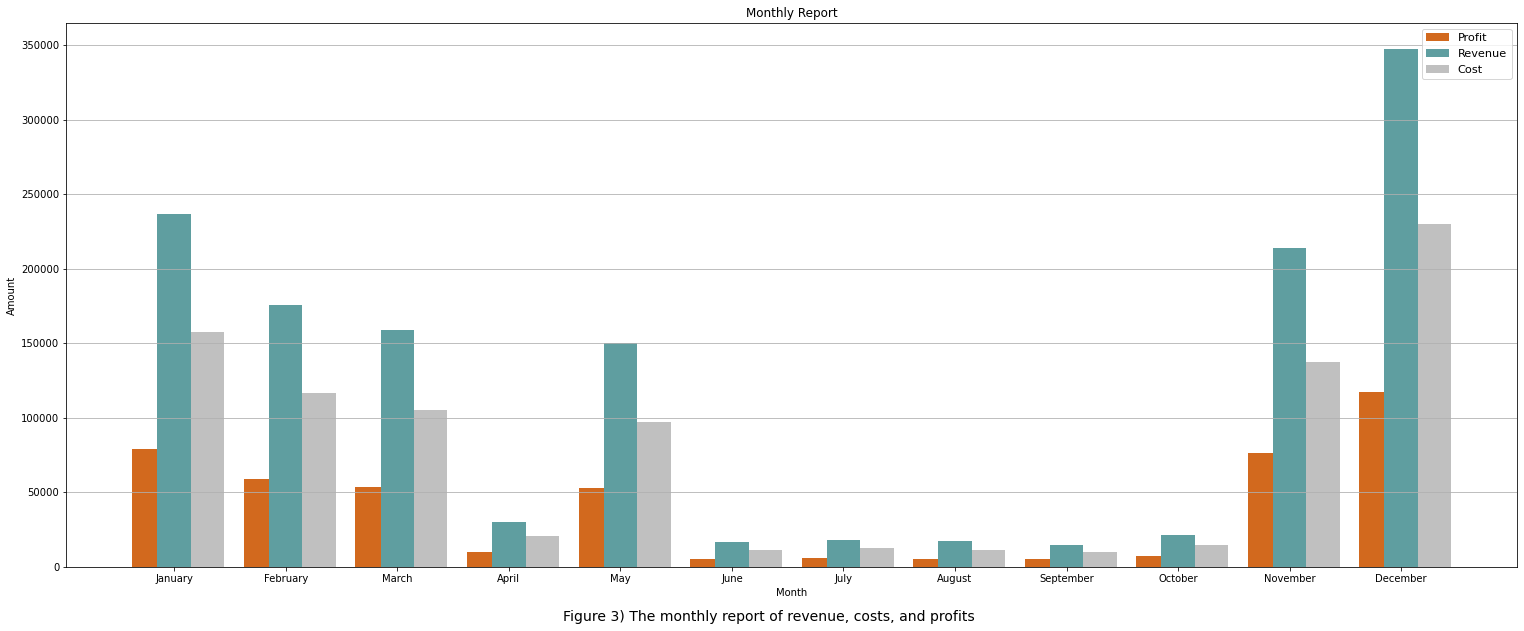

In [14]:
## Setting the size of the figure
plt.figure(figsize=(26,10))

## Labelling the values for horizontal line
xaxis = np.arange(len(Months))## Making the flavour into int values
plt.xticks(xaxis,Months)

## Labelling the vertical line, horizontal line, title of the figure
plt.ylabel('Amount')
plt.xlabel('Month')
plt.title('Monthly Report')

## Creating the bar graph with values
plt.bar(xaxis-0.1,month_profit,width=0.55,color='chocolate',label='Profit')
plt.bar(xaxis,month_rev,width=0.3,color='cadetblue',label='Revenue')
plt.bar(xaxis+0.3,month_cost,width=0.3,color='silver',label='Cost')

## Labelling the figure number and name of figure
txt="Figure 3) The monthly report of revenue, costs, and profits"
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=14)

## Creating the legend of the figure
plt.legend(loc='upper right',prop={'size': 11.3})

## Creating a grid horizontal lines only
plt.grid(axis='y')

## Showing the figure created
plt.show()

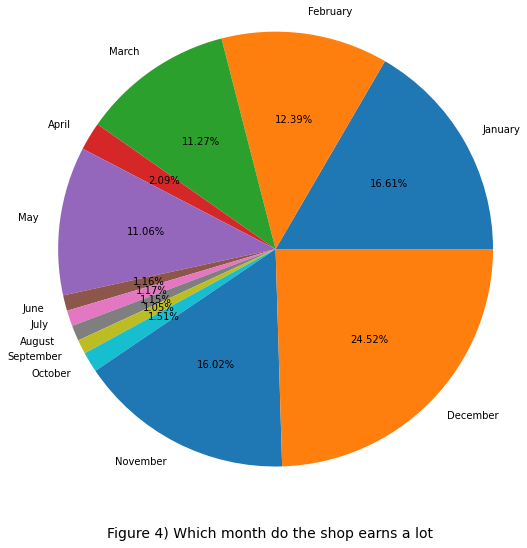

In [15]:
## Storing a value to the variable
month_selling = Months

## Creating a perfect circle
plt.axis('equal')

## Creating the pie chart with respect to the month_profit
plt.pie(month_profit,labels=month_selling,radius=2.5,autopct='%0.2f%%',explode=[0,0,0,0,0,0,0,0,0,0,0,0])

## Labelling the figure number and name of figure
txt="Figure 4) Which month do the shop earns a lot"
plt.figtext(0.5, -0.5, txt, wrap=True, horizontalalignment='center', fontsize=14)

## Showing the figure created
plt.show()

#### Flavor Sales

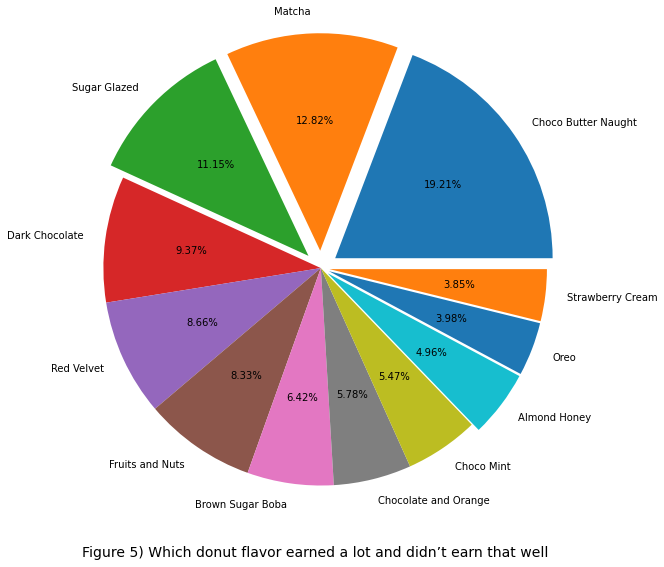

In [16]:
## Storing a value to a variable 
top_selling_flavors = [sorts[0] for sorts in sorted(Flavor, key=lambda x: x[1],reverse=True)]
top_selling_value = np.sort(flavor_profit)[::-1]

## Creating a perfect circle
plt.axis('equal')

## Creating the pie chart with respect to the flavor_profit
plt.pie(top_selling_value,labels=top_selling_flavors,radius=2.5,autopct='%0.2f%%',explode=[.2,.2,.2,0,0,0,0,0,0,0.1,0.1,0.1])

## Labelling the figure number and name of figure
txt="Figure 5) Which donut flavor earned a lot and didn’t earn that well"
plt.figtext(0.5, -0.5, txt, wrap=True, horizontalalignment='center', fontsize=14)

## Showing the figure created
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

       Good Day Mr./Ms./Mrs. Bebang Ng, Thank You for entrusting me to be the analyst of your donut shop.  As you requested in the email, you wanna know the monthly revenues, monthly costs, and monthly profits; How much profit do the shop gain for each flavor and identify the 3 best selling and 3 least selling donut flavors. 
       
        5 figures of visualization were given to understand the different data better. 5 figures that can explain;
        
        Figure 1) Which donut flavor is the trend per month; 
        Figure 2) Which donut flavor sales a lot and earned a lot;
        Figure 3) The monthly report of revenue, costs, and profits;
        Figure 4) Which month do the shop earn a lot; and
        Figure 5) Which donut flavor earned a lot and didn’t earn that well.
        
![title](figures/figure1.png)
    
        As seen in Figure 1, The Choco Butter Naught is the most trend donut flavors in your 12 donut flavor varieties. The month of May, July, October, November, and December is when the Choco Butter Naught sells the most.  Meanwhile, the flavor that didn’t trend is the Dark Chocolate flavor. The months that Dark Chocolate didn’t sell quite well are March, June, July, August, September, and October.   
        
        The price per piece of the 12 flavors didn’t affect the satisfaction of the customer. As seen in Figure 2, as one of the expensive flavors with a price of ₱45 yet it is the flavor that loves by the customers.
        
![title](figures/figure2.png)
    
        Figure 2 shows what donut flavor loves by the customers. The Choco Butter Naught flavor is most loves by the customers. Annually, Choco Butter Naught earned a total of ₱91,770, and the total sold is 6,555 pieces. One donut flavor doesn’t satisfy the customer, which is the Almond Honey. It only has a total profit of ₱23,715 and a total sales of 1,581.
        
![title](figures/figure3.png)

        Based on Figure 3, the highest profit by the donut shop is December; whereas it earned a total profit of ₱117,156. While the record low earned profit by the donut shop in September. The shop only earned a total of ₱5,034.
        
![title](figures/figure4.png)  

        Figure 4 shows that the month of December contributes 24.52% to the annual profit.  While the month of September contributes 1.05% to the annual profit. 
        
![title](figures/figure5.png)

        Figure 5 shows that in 12 varieties of donut flavor in your shop which tells what donut flavor contributes to the profit. The Choco Butter Naught is the most profitable flavor with 19.21% and has 6,555 pieces most sold. The second most profitable flavor is Matcha with a profit of 12.82%  and a sales of 4,083 pieces. The third flavor is Sugar Glazed with 11.15% and a sales of 5,326 pieces. 
        
        The least flavor that contributes to profit is Strawberry Cream with 3.85% with sales of 2,043 pieces. The second to the least flavor is Oreo with 3.98% and a sales of 1,904 pieces.  And the third to the least flavor is Almond Honey with 4.96% with a sales of 1,581 pieces. 
        
        Upon analyzing and explaining the figures made from data, Mr./Ms./Mrs. Bebang Ng don’t worry. The donut gives enough profit to sustain the business. As the analyst here is my recommendation to improve furthermore the donut shop;
        
            1) Donut is not seasonal food. The data and the figures show that there are months that are low in profit. Here is some way to boost sales in those months 
            
                1.1)Have an event where the customers can get limited edition items. As such, an event whereby eating enough donuts in the shop they can get the limited edition items. 
                
                1.2)Promo for the donuts, since buying them for a piece is expensive enough have a promo that lowers the price by ₱1-₱20. 
                
                1.3) By having a closing time promo where they can buy the donut at a cheaper price.
                
                1.4) Have your donut available at different food delivery service so the customers can buy your products even they are in respective homes. 
                
            2)   As noticed in the data and shown in the figures, there are 3 flavors that Bebang should revisit; Almond Honey, Dark Chocolate, and Oreo. The said flavors received the lowest sales compared to other flavors. Yet those flavors are not a loss in profit to the shop however to boost the sales of the shop revisit the 3 flavors. 



In [17]:
file_Costs = "Bebang Ng_Costs.csv"
file_ProfitF = "Bebang Ng_Profit per Flavor.csv"
file_Profit = "Bebang Ng_Profit.csv"
file_RevenueF = "Bebang Ng_Revenue_Costs per flavor.csv"

df_Cost = pd.read_csv(file_Costs, index_col=0)
df_ProfitsF = pd.read_csv(file_ProfitF)
df_ProfitssF = pd.read_csv(file_Profit)
df_Revenues = pd.read_csv(file_RevenueF)

## Let's check what's in df_prices
df_Cost

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,TOTAL:,checking
COST,,,,,,,,,,,,,,
red velvet,"19,525.00","13,100.00","9,100.00","3,925.00","22,350.00","1,400.00","2,225.00","1,025.00",575,"1,950.00","5,775.00","22,475.00","103,425.00",-
oreo,"3,150.00","4,860.00","5,160.00",480,"1,845.00",15,45,-,15,90,"4,680.00","8,220.00","28,560.00",-
sugar glazed,5990,6740,8540,140,4670,780,360,480,750,980,7810,16020,"53,260.00",-
almond honey,2480,2240,2280,460,3960,240,640,820,460,720,6000,11320,"31,620.00",-
matcha,22575,17430,30975,3430,6195,3430,1505,3360,910,2485,19215,31395,"142,905.00",-
strawberry cream,6510,11532,11439,2418,5053,806,1395,682,1674,1271,6417,14136,"63,333.00",-
brown sugar boba,29430,11400,4620,420,4410,450,2940,990,690,1080,16560,18990,"91,980.00",-
furits and nuts,11950,11550,8850,1225,2225,0,25,0,25,200,8375,5350,"49,775.00",-
dark chocolate,8970,3045,540,1440,11835,60,75,0,120,0,11835,6870,"44,790.00",-


In [18]:
## Let's check what's in df_ProfitsF
df_ProfitsF

,PROFIT PER FLAVOR,ANNUAL
0,red velvet,"41,370.00"
1,oreo,"19,040.00"
2,sugar glazed,"53,260.00"
3,almond honey,"23,715.00"
4,matcha,"61,245.00"
5,strawberry cream,"18,387.00"
6,brown sugar boba,"30,660.00"
7,furits and nuts,"39,820.00"
8,dark chocolate,"44,790.00"
9,chocolate and orange,"27,615.00"


In [19]:
## Let's check what's in df_ProfitssF
df_ProfitssF

,PROFIT,"79,371.00","59,208.00","53,850.00","10,001.00","52,824.00","5,527.00","5,598.00","5,498.00","5,034.00","7,213.00","76,548.00","117,156.00","477,828.00"


In [21]:
## Let's check what's in df_Revenues
df_Revenues

,REVENUE per Flavor (ANNUAL),Unnamed: 1,COST per Flavor (ANNUAL)
0,"144,795.00",NaN,"103,425.00"
1,"47,600.00",NaN,"28,560.00"
2,"106,520.00",NaN,"53,260.00"
3,"55,335.00",NaN,"31,620.00"
4,"204,150.00",NaN,"142,905.00"
5,"81,720.00",NaN,"63,333.00"
6,"122,640.00",NaN,"91,980.00"
7,"89,595.00",NaN,"49,775.00"
8,"89,580.00",NaN,"44,790.00"
9,"73,640.00",NaN,"46,025.00"
